# Stock Price Prediction

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import plotly.express as px
import seaborn as sns
import streamlit as st
import requests
import codecs
import os
from streamlit_lottie import st_lottie
import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import date
from datetime import timedelta
today = date.today()
print("Today is: ", today)
 
# Yesterday date
yesterday = today - timedelta(days = 1)
print("Yesterday was: ", yesterday)

Today is:  2022-04-02
Yesterday was:  2022-04-01


# Extracting the data

In [3]:
start='2008-01-01'
end=yesterday;

df=data.DataReader('AAPL','yahoo',start,end) #extracting data of aapl from yahoo between start and end datesaa
df

2022-04-02 15:29:52.746 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.057530
2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.958447
2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.961198
2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.506150
2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.432449
...,...,...,...,...,...,...
2022-03-29,179.009995,176.339996,176.690002,178.960007,1.005894e+08,178.960007
2022-03-30,179.610001,176.699997,178.550003,177.770004,9.263320e+07,177.770004
2022-03-31,178.029999,174.399994,177.839996,174.610001,1.030493e+08,174.610001


# Preprocessing

In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-12-31,7.160714,7.062500,7.125000,7.074286,5.393332e+08,6.057530
1,2008-01-02,7.152143,6.876786,7.116786,6.958571,1.079179e+09,5.958447
2,2008-01-03,7.049643,6.881786,6.978929,6.961786,8.420664e+08,5.961198
3,2008-01-04,6.892857,6.388929,6.837500,6.430357,1.455832e+09,5.506150
4,2008-01-07,6.557143,6.079643,6.473214,6.344286,2.072193e+09,5.432449


In [5]:
date=df['Date']
df.drop(['Date','Adj Close'],axis=1,inplace=True)
df.head()

,High,Low,Open,Close,Volume
0,7.160714,7.062500,7.125000,7.074286,5.393332e+08
1,7.152143,6.876786,7.116786,6.958571,1.079179e+09
2,7.049643,6.881786,6.978929,6.961786,8.420664e+08
3,6.892857,6.388929,6.837500,6.430357,1.455832e+09
4,6.557143,6.079643,6.473214,6.344286,2.072193e+09


In [6]:
df.describe()

,High,Low,Open,Close,Volume
count,3591.000000,3591.000000,3591.000000,3591.000000,3.591000e+03
mean,40.070279,39.227038,39.646078,39.667325,3.487330e+08
std,41.584983,40.630210,41.097734,41.135446,3.368310e+08
min,2.928571,2.792857,2.835357,2.792857,4.100000e+07
25%,13.291608,12.847679,13.028393,13.053035,1.151480e+08
50%,25.385000,24.977142,25.142500,25.200001,2.222016e+08
75%,46.307501,45.586248,45.965000,45.968750,4.582596e+08
max,182.940002,179.119995,182.630005,182.009995,3.372970e+09


# EDA(Exploratory Data Analysis)

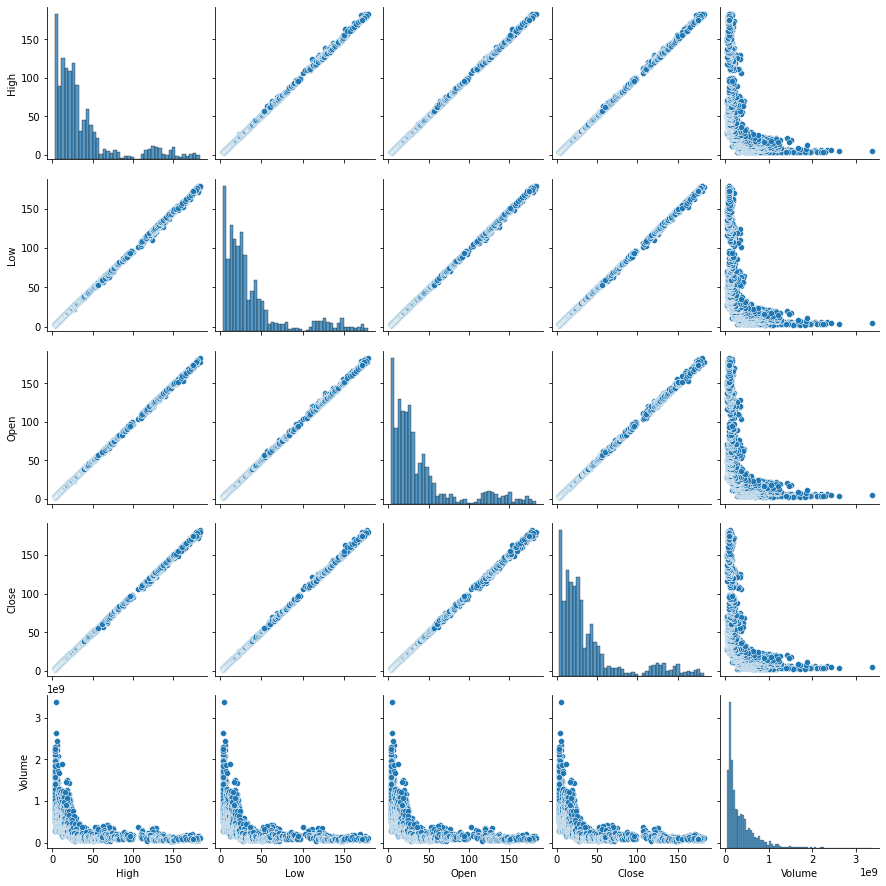

In [7]:
sns.pairplot(df)

<AxesSubplot:xlabel='Open', ylabel='Density'>

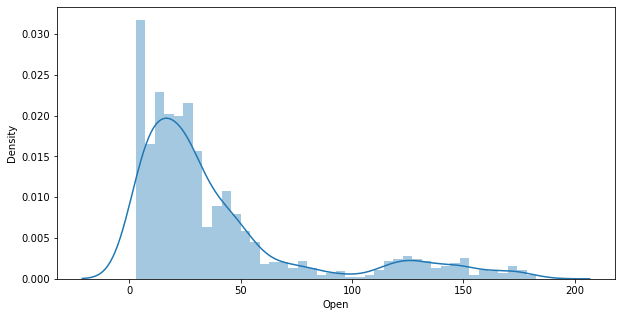

In [8]:
plt.subplots(figsize=(10,5))
sns.distplot(df['Open'])

<AxesSubplot:xlabel='Close', ylabel='Density'>

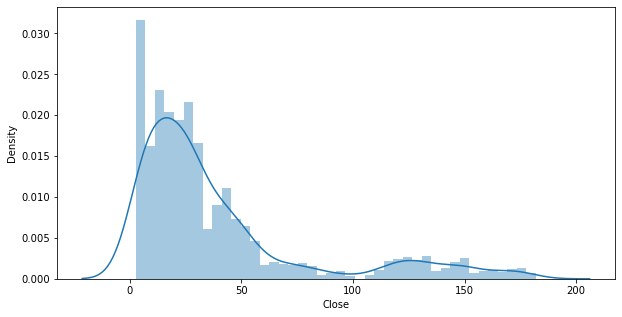

In [9]:
plt.subplots(figsize=(10,5))
sns.distplot(df['Close'])

# Model SELECTION AND PREDICTION for attribute Close

In [10]:
average100=df['Close'].rolling(100).mean()
average100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3586    166.808201
3587    167.076301
3588    167.309601
3589    167.548300
3590    167.783300
Name: Close, Length: 3591, dtype: float64

In [11]:
average30=df['Close'].rolling(100).mean()
average30

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3586    166.808201
3587    167.076301
3588    167.309601
3589    167.548300
3590    167.783300
Name: Close, Length: 3591, dtype: float64

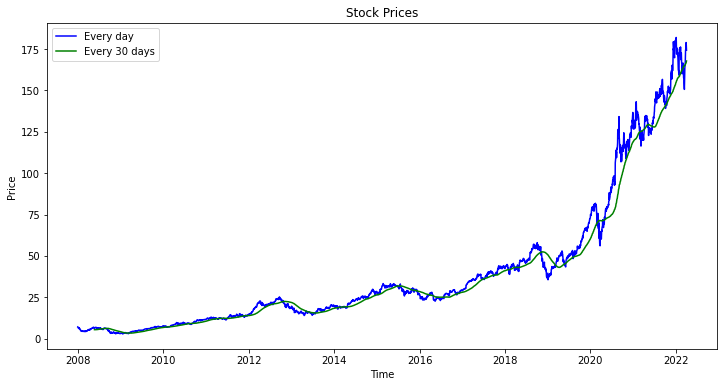

In [12]:
plt.figure(figsize=(12,6))
plt.plot(date,df['Close'],color='blue',label="Every day")
plt.plot(date,average30,color='green',label="Every 30 days")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

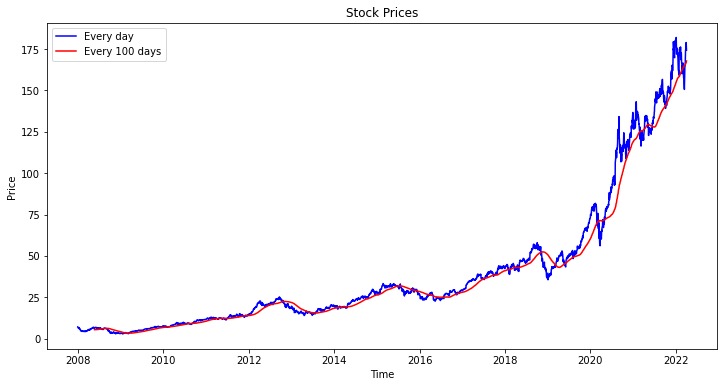

In [13]:
plt.figure(figsize=(12,6))
plt.plot(date,df['Close'],color='blue',label="Every day")
plt.plot(date,average100,color='red',label="Every 100 days")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [14]:
df.shape

(3591, 5)

In [15]:
#Splitting data into training and testing

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
ydate= date[int(len(df)*0.7):int(len(df))]
print(data_training.shape)
print(data_testing.shape)

(2513, 1)
(1078, 1)


In [16]:
data_training.head()

,Close
0,7.074286
1,6.958571
2,6.961786
3,6.430357
4,6.344286


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
dataset_train = scaler.fit_transform(data_training)
dataset_test = scaler.transform(data_testing)

In [19]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    print(x)
    return x,y

In [20]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
#displaying x_train and x_test

[[0.10363609 0.1008351  0.10091292 ... 0.03586805 0.0424901  0.04134896]
 [0.1008351  0.10091292 0.08804917 ... 0.0424901  0.04134896 0.04300016]
 [0.10091292 0.08804917 0.08596574 ... 0.04134896 0.04300016 0.04185039]
 ...
 [0.87219257 0.87546033 0.87582341 ... 0.97488636 0.97458376 0.98517387]
 [0.87546033 0.87582341 0.87975693 ... 0.97458376 0.98517387 1.        ]
 [0.87582341 0.87975693 0.87642859 ... 0.98517387 1.         0.98862317]]
[[0.99146738 0.99146738 0.96459884 ... 0.99872924 1.00242065 1.00151287]
 [0.99146738 0.96459884 0.96478038 ... 1.00242065 1.00151287 0.99158843]
 [0.96459884 0.96478038 0.96768507 ... 1.00151287 0.99158843 1.0031468 ]
 ...
 [3.95615256 3.91451828 3.86368599 ... 4.18296264 4.26429468 4.23548953]
 [3.91451828 3.86368599 3.84456308 ... 4.26429468 4.23548953 4.15899861]
 [3.86368599 3.84456308 3.8000242  ... 4.23548953 4.15899861 4.15173675]]


In [21]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [26]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction')

Epoch 1/50
77/77 [==============================] - 35s 208ms/step - loss: 0.0103
Epoch 2/50
77/77 [==============================] - 15s 188ms/step - loss: 0.0027
Epoch 3/50
77/77 [==============================] - 15s 190ms/step - loss: 0.0020
Epoch 4/50
77/77 [==============================] - 14s 185ms/step - loss: 0.0019
Epoch 5/50
77/77 [==============================] - 14s 182ms/step - loss: 0.0018
Epoch 6/50
77/77 [==============================] - 14s 188ms/step - loss: 0.0016
Epoch 7/50
77/77 [==============================] - 14s 180ms/step - loss: 0.0015
Epoch 8/50
77/77 [==============================] - 14s 186ms/step - loss: 0.0014
Epoch 9/50
77/77 [==============================] - 14s 180ms/step - loss: 0.0015
Epoch 10/50
77/77 [==============================] - 14s 184ms/step - loss: 0.0016
Epoch 11/50
77/77 [==============================] - 14s 187ms/step - loss: 0.0016
Epoch 12/50
77/77 [==============================] - 14s 184ms/step - loss: 0.0016
Epoch 13/50
7

2022-04-02 15:43:00.454 WARNING absl: Found untraced functions such as lstm_cell_layer_call_fn, lstm_cell_layer_call_and_return_conditional_losses, lstm_cell_1_layer_call_fn, lstm_cell_1_layer_call_and_return_conditional_losses, lstm_cell_2_layer_call_fn while saving (showing 5 of 8). These functions will not be directly callable after loading.
2022-04-02 15:43:20.566 INFO    tensorflow: Assets written to: stock_prediction\assets
2022-04-02 15:43:35.186 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x000001F1F8077790> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.
2022-04-02 15:43:35.188 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x000001F1F823AEB0> has the same name 'LSTMCell' as a built-in Keras object. Consider renami

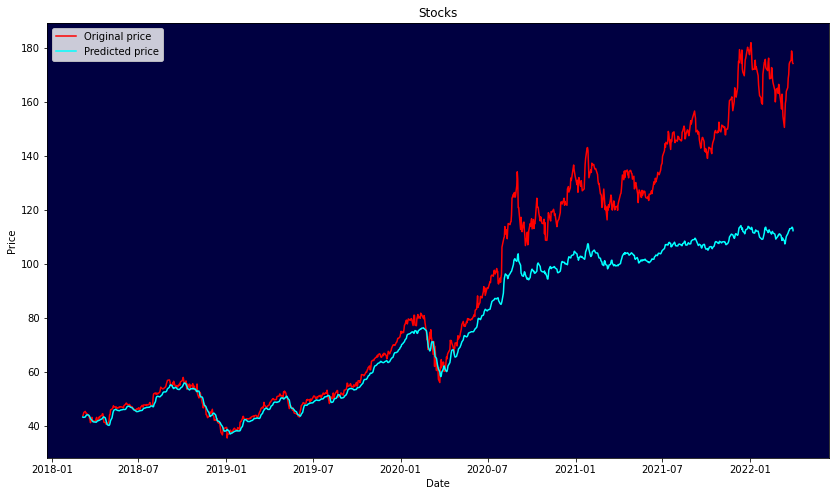

In [27]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

cydate=ydate[50:]
fig, ax = plt.subplots(figsize=(14,8))
ax.set_facecolor('#000041')
ax.plot(cydate,y_test_scaled, color='red', label='Original price')
plt.plot(cydate,predictions, color='cyan', label='Predicted price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stocks")
plt.legend()

# Model SELECTION AND PREDICTION for attribute Open

In [28]:
average100=df['Open'].rolling(100).mean()
average100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3586    166.483300
3587    166.753000
3588    167.012500
3589    167.238699
3590    167.477000
Name: Open, Length: 3591, dtype: float64

In [29]:
average30=df['Open'].rolling(100).mean()
average30

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3586    166.483300
3587    166.753000
3588    167.012500
3589    167.238699
3590    167.477000
Name: Open, Length: 3591, dtype: float64

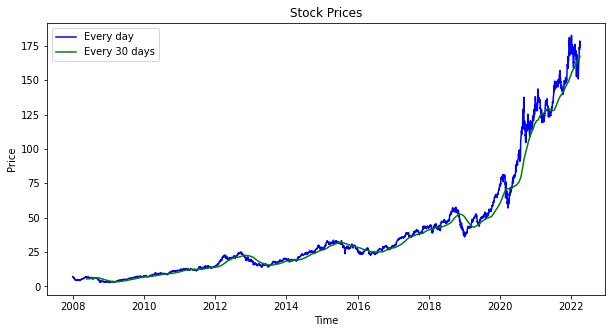

In [30]:
plt.figure(figsize=(10,5))
plt.plot(date,df['Open'],color='blue',label="Every day")
plt.plot(date,average30,color='green',label="Every 30 days")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

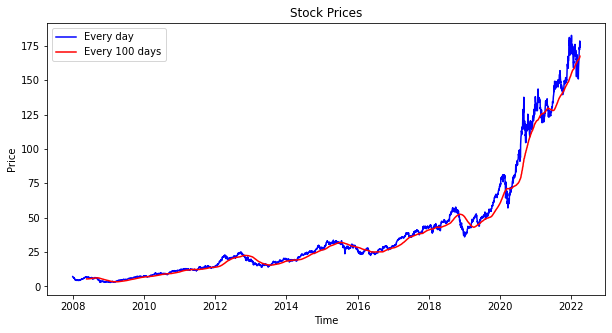

In [31]:
plt.figure(figsize=(10,5))
plt.plot(date,df['Open'],color='blue',label="Every day")
plt.plot(date,average100,color='red',label="Every 100 days")
plt.title("Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [32]:
df.shape

(3591, 5)

In [33]:
#Splitting data into training and testing

data_training= pd.DataFrame(df['Open'][0:int(len(df)*0.7)])
data_testing= pd.DataFrame(df['Open'][int(len(df)*0.7):int(len(df))])
ydate= date[int(len(df)*0.7):int(len(df))]
print(data_training.shape)
print(data_testing.shape)

(2513, 1)
(1078, 1)


In [34]:
data_training.head()

,Open
0,7.125000
1,7.116786
2,6.978929
3,6.837500
4,6.473214


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [36]:
dataset_train = scaler.fit_transform(data_training)
dataset_test = scaler.transform(data_testing)

In [37]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    print(x)
    return x,y

In [38]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
#displaying x_train and x_test

[[0.10477329 0.10457267 0.10120555 ... 0.03715175 0.03900104 0.04156564]
 [0.10457267 0.10120555 0.09775119 ... 0.03900104 0.04156564 0.03900104]
 [0.10120555 0.09775119 0.08885361 ... 0.04156564 0.03900104 0.04404298]
 ...
 [0.87702159 0.88215075 0.8836773  ... 0.98406287 0.98345222 0.99096288]
 [0.88215075 0.8836773  0.88312776 ... 0.98345222 0.99096288 0.99859561]
 [0.8836773  0.88312776 0.88544814 ... 0.99096288 0.99859561 0.99951149]]
[[0.99426018 0.9973743  0.97368239 ... 0.98589474 1.00061066 1.01709732]
 [0.9973743  0.97368239 0.96940808 ... 1.00061066 1.01709732 0.99896196]
 [0.97368239 0.96940808 0.97490361 ... 1.01709732 0.99896196 1.00225926]
 ...
 [4.08294803 4.0091853  3.9466581  ... 4.13594961 4.24634941 4.29177938]
 [4.0091853  3.9466581  3.83918953 ... 4.24634941 4.29177938 4.27443767]
 [3.9466581  3.83918953 3.81378762 ... 4.29177938 4.27443767 4.18137959]]


In [39]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [41]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [42]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [43]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction')

Epoch 1/50
77/77 [==============================] - 30s 183ms/step - loss: 0.0132
Epoch 2/50
77/77 [==============================] - 14s 188ms/step - loss: 0.0021
Epoch 3/50
77/77 [==============================] - 14s 186ms/step - loss: 0.0019
Epoch 4/50
77/77 [==============================] - 16s 205ms/step - loss: 0.0019
Epoch 5/50
77/77 [==============================] - 15s 195ms/step - loss: 0.0019
Epoch 6/50
77/77 [==============================] - 14s 185ms/step - loss: 0.0018
Epoch 7/50
77/77 [==============================] - 15s 199ms/step - loss: 0.0016
Epoch 8/50
77/77 [==============================] - 14s 187ms/step - loss: 0.0018
Epoch 9/50
77/77 [==============================] - 15s 197ms/step - loss: 0.0016
Epoch 10/50
77/77 [==============================] - 14s 185ms/step - loss: 0.0014
Epoch 11/50
77/77 [==============================] - 14s 188ms/step - loss: 0.0013
Epoch 12/50
77/77 [==============================] - 14s 181ms/step - loss: 0.0014
Epoch 13/50
7

2022-04-02 15:56:33.062 WARNING absl: Found untraced functions such as lstm_cell_4_layer_call_fn, lstm_cell_4_layer_call_and_return_conditional_losses, lstm_cell_5_layer_call_fn, lstm_cell_5_layer_call_and_return_conditional_losses, lstm_cell_6_layer_call_fn while saving (showing 5 of 8). These functions will not be directly callable after loading.
2022-04-02 15:56:51.713 INFO    tensorflow: Assets written to: stock_prediction\assets
2022-04-02 15:57:05.983 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x000001F1A6B98BB0> has the same name 'LSTMCell' as a built-in Keras object. Consider renaming <class 'keras.layers.recurrent.LSTMCell'> to avoid naming conflicts when loading with `tf.keras.models.load_model`. If renaming is not possible, pass the object in the `custom_objects` parameter of the load function.
2022-04-02 15:57:05.983 WARNING absl: <keras.layers.recurrent.LSTMCell object at 0x000001F1A6D0D910> has the same name 'LSTMCell' as a built-in Keras object. Consider re

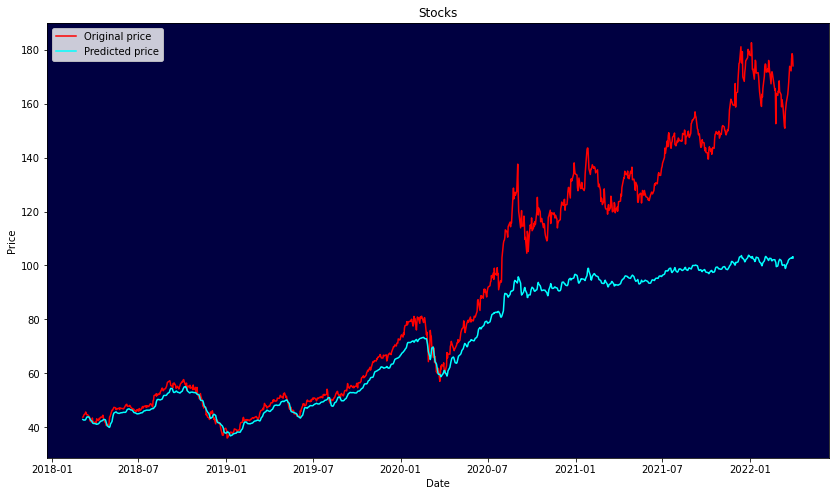

In [44]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

cydate=ydate[50:]
fig, ax = plt.subplots(figsize=(14,8))
ax.set_facecolor('#000041')
ax.plot(cydate,y_test_scaled, color='red', label='Original price')
plt.plot(cydate,predictions, color='cyan', label='Predicted price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stocks")
plt.legend()

# Thank you...